Rincian Tugas:
1. Carilah sebuah dataset (dari kaggle ataupun website lainnya)
2. Lakukan Exploratory Data Analysis pada dataset tersebut.
  - EDA yang dilakukan WAJIB melakukan `Handling Missing Value dan Duplicate`
  - Proses EDA yang lain bersifat opsional (e.g. *handling outlier*, *encoding*)
3. Buat portfolio dalam bentuk Power Point
4. Upload di LinkedIn dan tag dibimbing.id

### 1. Carilah sebuah dataset (dari kaggle ataupun website lainnya)

Data set yang digunakan adalah Online Retail II UCI (link: https://www.kaggle.com/datasets/mashlyn/online-retail-ii-uci)

In [4]:
# Mengimport library pandas untuk membaca dataset
import pandas as pd

# baca dataset csv menggunakan syntax pd.read_csv()
df = pd.read_csv('C:/Users/ASUS/Downloads/drive-download-20250722T120957Z-1-001/online_retail_II.csv')

In [5]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


### 2. Lakukan Exploratory Data Analysis pada dataset tersebut.
  - EDA yang dilakukan WAJIB melakukan `Handling Missing Value dan Duplicate`
  - Proses EDA yang lain bersifat opsional (e.g. *handling outlier*, *encoding*)

In [6]:
# mengetahui info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [7]:
# mengecek missing value
df.isna().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

dari df.isna().sum(), terlihat bahwa sebanyak 4382 missing value untuk variabel/kolom Description dan 243007 missing value untuk variabel/kolom Customer ID

In [8]:
# cek statistical summary
df.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


Kenapa yang muncul hanya Quantity, Price, dan Customer ID saja jika menggunakan syntax df.describe()? karena tiga variabel tersebut memiliki jenis data (value) berupa integer (int) dan float. Object tidak masuk ke dalam statistical summary

In [9]:
df['Country'].describe()

count            1067371
unique                43
top       United Kingdom
freq              981330
Name: Country, dtype: object

In [10]:
# Mengatasi missing value
for column in df.columns:
    if df[column].dtype == 'object':
        # Jika kolom bertipe object, isi dengan mode
        df[column].fillna(df[column].mode()[0], inplace = True)
    else:
        # Jika kolom bertipe object, isi dengan mean
        df[column].fillna(df[column].mean(), inplace = True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20372\708413840.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace = True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_20372\708413840.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [11]:
# cek kembali missing value
df.isna().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1067371 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  1067371 non-null  float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [13]:
# Mengecek apakah ada duplicate di seluruh kolom

check_duplicate = df.duplicated().sum()

print(f"Jumlah data yang duplikat= {check_duplicate}")

Jumlah data yang duplikat= 34335


In [14]:
# Handling duplicates

df = df.drop_duplicates()

In [15]:
# Mengecek duplicate setelah dihandle

handle_duplicate = df.duplicated().sum()

print(f"Jumlah data yang duplikat= {handle_duplicate}")

Jumlah data yang duplikat= 0


### Analisis Tambahan

In [16]:
# Membuat kolom baru
df['TotalPrice'] = df['Quantity'] * df['Price']

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20372\424940990.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalPrice'] = df['Quantity'] * df['Price']


In [17]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85


In [18]:
# Mencari 10 produk terlaris
df.groupby('Description')['Quantity'].sum().nlargest(10)

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     104546
ASSORTED COLOUR BIRD ORNAMENT          79579
JUMBO BAG RED RETROSPOT                76514
BROCADE RING PURSE                     69639
PACK OF 60 PINK PAISLEY CAKE CASES     55842
60 TEATIME FAIRY CAKE CASES            53678
SMALL POPCORN HOLDER                   48234
PACK OF 72 RETROSPOT CAKE CASES        47695
PACK OF 72 RETRO SPOT CAKE CASES       46079
ASSORTED COLOURS SILK FAN              43463
Name: Quantity, dtype: int64

In [19]:
# Mencari 10 negara dengan penjualan tertinggi
df.groupby('Country')['TotalPrice'].sum().nlargest(10)

Country
United Kingdom    1.598606e+07
EIRE              6.099538e+05
Netherlands       5.483307e+05
Germany           4.119592e+05
France            3.217334e+05
Australia         1.664444e+05
Switzerland       9.940306e+04
Spain             9.101344e+04
Sweden            8.777552e+04
Denmark           6.445959e+04
Name: TotalPrice, dtype: float64

### Visualisasi

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
sns.set(style="whitegrid")

#### Visualisasi Top 10 Produk Terlaris

In [22]:
# Menghitung 10 produk dengan kuantitas penjualan tertinggi
top_10_products = df.groupby('Description')['Quantity'].sum().nlargest(10)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20372\4286192054.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_products.values, y=top_10_products.index, palette='viridis')


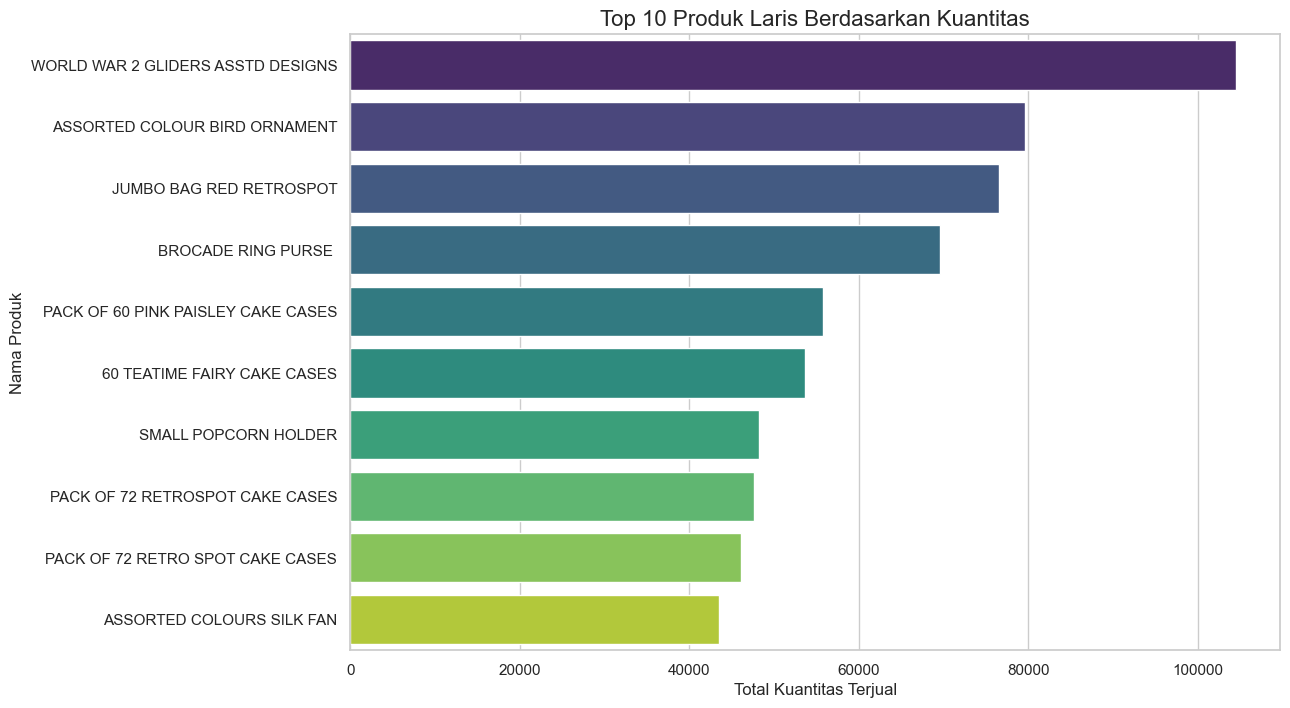

In [23]:
# Membuat visualisasi
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_products.values, y=top_10_products.index, palette='viridis')

# Menambahkan judul dan label
plt.title('Top 10 Produk Laris Berdasarkan Kuantitas', fontsize=16)
plt.xlabel('Total Kuantitas Terjual', fontsize=12)
plt.ylabel('Nama Produk', fontsize=12)
plt.show()

#### Visualisasi Top 10 Negara dengan Penjualan Tertinggi

In [24]:
# Menghitung 10 negara dengan total penjualan tertinggi
# Di sini, United Kingdom akan dikecualikan agar bisa melihat negara lain dengan lebih jelas
top_10_countries = df[df['Country'] != 'United Kingdom'].groupby('Country')['TotalPrice'].sum().nlargest(10)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20372\214826844.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot (x=top_10_countries.values, y=top_10_countries.index, palette='plasma')


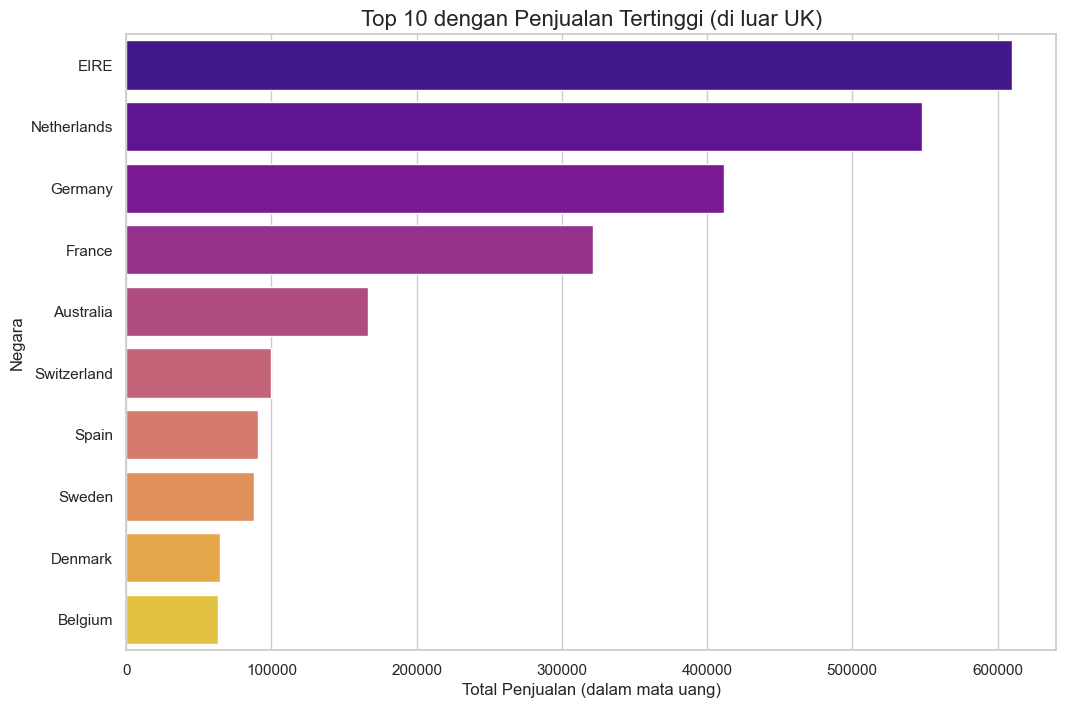

In [25]:
# Membuat visualisasi
plt.figure(figsize=(12, 8))
sns.barplot (x=top_10_countries.values, y=top_10_countries.index, palette='plasma')

# Menambahkan judul dan label
plt.title('Top 10 dengan Penjualan Tertinggi (di luar UK)', fontsize=16)
plt.xlabel('Total Penjualan (dalam mata uang)', fontsize=12)
plt.ylabel('Negara', fontsize=12)
plt.show()

#### Analisis Tren Penjualan Bulanan

In [ ]:
# Mengubah kolom 'InvoiceDate' menjadi tipe data datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20372\737461376.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [27]:
# Membuat kolom baru 'YearMonth' untuk grouping
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20372\2987092227.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')


In [28]:
# Menghitung total penjualan per bulan
monthly_sales = df.groupby('YearMonth')['TotalPrice'].sum()

In [29]:
# Mengubah periode menjadi string agar bisa diplot
monthly_sales.index = monthly_sales.index.strftime('%Y-%m')

<function matplotlib.pyplot.show(close=None, block=None)>

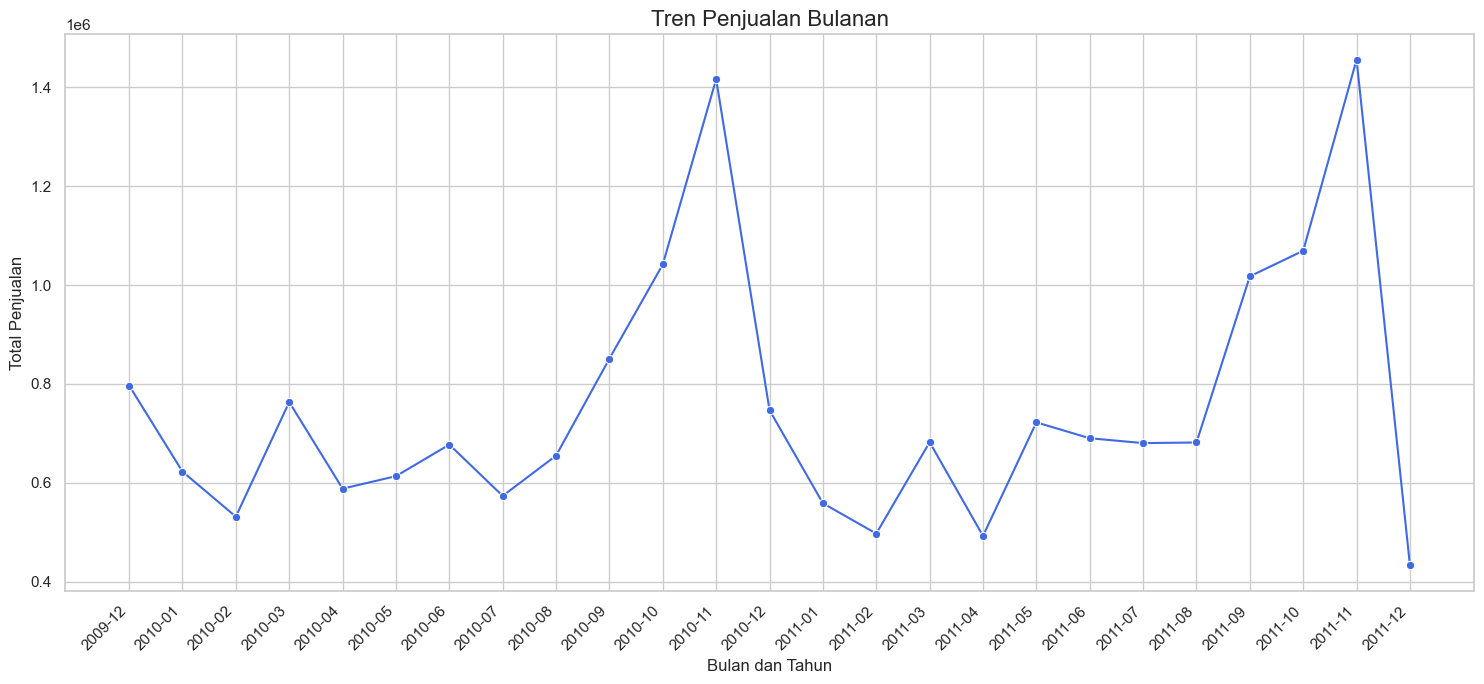

In [30]:
# Membuat visualusasi
plt.figure(figsize=(15, 7))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', color='royalblue')

# Menambahkan judul dan label
plt.title('Tren Penjualan Bulanan', fontsize=16)
plt.xlabel('Bulan dan Tahun', fontsize=12)
plt.ylabel('Total Penjualan', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show